In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import trange
from sklearn.preprocessing import StandardScaler

In [ ]:
x_12 = np.load('/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-12-X.npy')
y_12 = np.load('/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-12-y.npy')
print(x_12.shape, y_12.shape)

(24000, 12) (24000,)


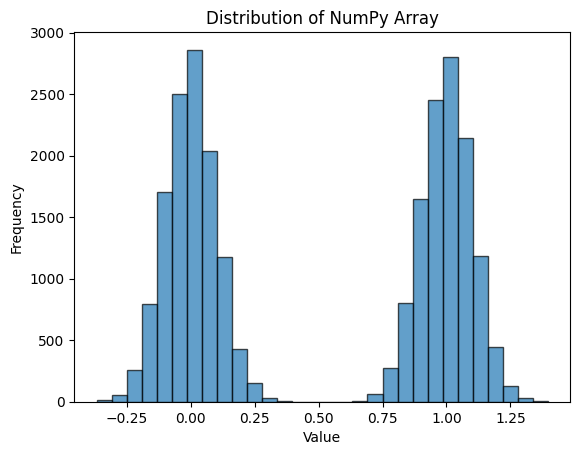

In [ ]:
data = x_12[:, 9]
# Step 2: Plot the distribution using a histogram
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)

# Step 3: Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of NumPy Array')

# Step 4: Show the plot
plt.show()

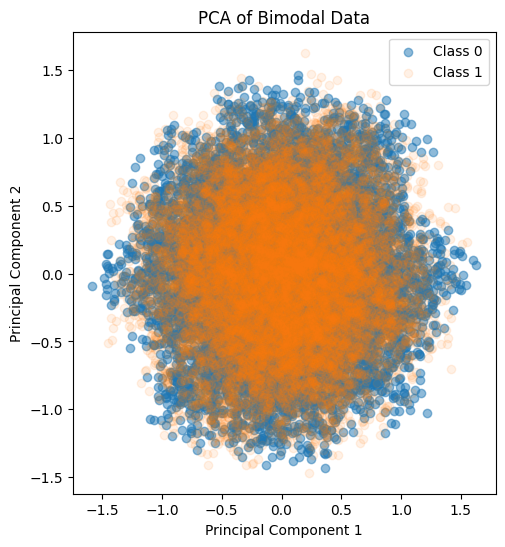

In [ ]:
# Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_12)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[y_12 == 0][:, 0], X_pca[y_12 == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_pca[y_12 == 1][:, 0], X_pca[y_12 == 1][:, 1], label='Class 1', alpha=0.1)
plt.title('PCA of Bimodal Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

In [ ]:
x_12 = np.load('/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-12-X.npy')
y_12 = np.load('/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-12-y.npy')
print(x_12.shape, y_12.shape)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_12, y_12, test_size=0.3, random_state=42)

(24000, 12) (24000,)


# SVM with RBF kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


x_12 = np.load('/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-12-X.npy')
y_12 = np.load('/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-12-y.npy')
print(x_12.shape, y_12.shape)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_12, y_12, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the kernels you want to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Dictionary to store accuracy for each kernel
kernel_accuracies = {}

# Loop through each kernel, train the model, and evaluate on the test set
for kernel in kernels:
    # Create SVM model with the current kernel
    svm_model = SVC(kernel=kernel, random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Predict on the test set
    predictions = svm_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Store and print accuracy for the current kernel
    kernel_accuracies[kernel] = accuracy
    print(f"Kernel: {kernel} - Test set Accuracy: {accuracy:.4f}")

# Find the best kernel based on test set accuracy
best_kernel = max(kernel_accuracies, key=kernel_accuracies.get)
print(f"\nBest kernel: {best_kernel} with Test set Accuracy: {kernel_accuracies[best_kernel]:.4f}")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def svm_binary_classifier(X_path, y_path, X_test, y_test, C=1, gamma=1):
    X = np.load(X_path)
    y = np.load(y_path)
    print(X_path.split('/')[-1].split('.')[0][:-2], '\n-----------------')
    print(X.shape, y.shape)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create the SVM model with RBF kernel and specified C, gamma
    svm_model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Predict on the test set
    predictions = svm_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"RBF Kernel (C={C}, gamma={gamma}) - Test set Accuracy: {accuracy:.4f}")

X_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-9-X.npy'
y_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-9-y.npy'

svm_binary_classifier(X_path, y_path, X_test, y_test)

kryptonite-9 
-----------------
(18000, 9) (18000,)
RBF Kernel (C=1, gamma=1) - Test set Accuracy: 0.9581


In [ ]:
X_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-12-X.npy'
y_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-12-y.npy'

svm_binary_classifier(X_path, y_path, X_test, y_test)

kryptonite-12 
-----------------
(24000, 12) (24000,)
RBF Kernel (C=1, gamma=1) - Test set Accuracy: 0.9342


In [ ]:
X_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-15-X.npy'
y_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-15-y.npy'

svm_binary_classifier(X_path, y_path, X_test, y_test, C=20, gamma=1)

kryptonite-15 
-----------------
(30000, 15) (30000,)
RBF Kernel (C=20, gamma=1) - Test set Accuracy: 0.5394


In [ ]:
X_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-15-X.npy'
y_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-15-y.npy'

svm_binary_classifier(X_path, y_path, X_test, y_test, C=20, gamma=2)

kryptonite-15 
-----------------
(30000, 15) (30000,)
RBF Kernel (C=20, gamma=2) - Test set Accuracy: 0.5942


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = np.load('/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-15-X.npy')
y = np.load('/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-15-y.npy')
print(X.shape, y.shape)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of values for C and gamma for the RBF kernel
C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1]

# Dictionary to store accuracy for each C and gamma combination
kernel_accuracies = {}

# Loop through different C and gamma values for the RBF kernel
for C in C_values:
    for gamma in gamma_values:
        # Create the SVM model with RBF kernel and specified C, gamma
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)

        # Train the model
        svm_model.fit(X_train, y_train)

        # Predict on the test set
        predictions = svm_model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)

        # Store accuracy for the current C and gamma combination
        kernel_accuracies[f'C={C}, gamma={gamma}'] = accuracy
        print(f"RBF Kernel (C={C}, gamma={gamma}) - Test set Accuracy: {accuracy:.4f}")

# Find the best model (highest accuracy)
best_model = max(kernel_accuracies, key=kernel_accuracies.get)
print(f"\nBest model: {best_model} with Test set Accuracy: {kernel_accuracies[best_model]:.4f}")


(30000, 15) (30000,)
RBF Kernel (C=0.1, gamma=0.001) - Test set Accuracy: 0.5006
RBF Kernel (C=0.1, gamma=0.01) - Test set Accuracy: 0.4999
RBF Kernel (C=0.1, gamma=0.1) - Test set Accuracy: 0.5066
RBF Kernel (C=0.1, gamma=1) - Test set Accuracy: 0.5016
RBF Kernel (C=1, gamma=0.001) - Test set Accuracy: 0.5028
RBF Kernel (C=1, gamma=0.01) - Test set Accuracy: 0.5053
RBF Kernel (C=1, gamma=0.1) - Test set Accuracy: 0.5057
RBF Kernel (C=1, gamma=1) - Test set Accuracy: 0.5107
RBF Kernel (C=10, gamma=0.001) - Test set Accuracy: 0.5027
RBF Kernel (C=10, gamma=0.01) - Test set Accuracy: 0.5126
RBF Kernel (C=10, gamma=0.1) - Test set Accuracy: 0.4969
RBF Kernel (C=10, gamma=1) - Test set Accuracy: 0.5816

Best model: C=10, gamma=1 with Test set Accuracy: 0.5816
